In [2]:
import pandas as pd
import numpy as np

In [3]:
cluster = 4

In [5]:
country_data = pd.read_csv("synthesized_data.csv")

In [6]:
country_data.shape

(178, 28)

In [7]:
country_data.isnull().sum()

Country                                     0
Population (thousands)                      5
Compulsory attendance amount               12
Early education attendance rate           127
Primary enrollment                          3
Secondary enrollment                        4
Tertiary enrollment                        18
Male literacy rate                         50
Female literacy rate                       50
Primary completion rate                     3
Primary to secondary transition rate        6
Primary drop out rate                       6
Lower secondary repeaters count             3
Primary repeaters count                     0
Primary repeaters rate                      0
School life expectancy                      1
Lower secondary teacher-student ratio      25
Primary teacher-student ratio               0
Upper secondary teacher-student ratio      28
Education spending (percentage of GDP)      4
Unemployment rate                          12
Child labor percentage            

In [8]:
country_data['Primary enrollment rate'] = country_data['Primary enrollment'] / country_data['Population (thousands)']
country_data['Secondary enrollment rate'] = country_data['Secondary enrollment'] / country_data['Population (thousands)']
country_data['Tertiary enrollment rate'] = country_data['Tertiary enrollment'] / country_data['Population (thousands)']
country_data['Lower secondary repeaters rate'] = country_data['Lower secondary repeaters count'] / country_data['Population (thousands)']
useful_data = country_data.loc[:, ~country_data.columns.isin(['Country', 'Primary enrollment', 'Secondary enrollment', 'Tertiary enrollment', 'Lower secondary repeaters count', 'Primary repeaters count', 'Average income', 'Average income currency'])]

In [9]:
useful_data.isnull().sum()

Population (thousands)                      5
Compulsory attendance amount               12
Early education attendance rate           127
Male literacy rate                         50
Female literacy rate                       50
Primary completion rate                     3
Primary to secondary transition rate        6
Primary drop out rate                       6
Primary repeaters rate                      0
School life expectancy                      1
Lower secondary teacher-student ratio      25
Primary teacher-student ratio               0
Upper secondary teacher-student ratio      28
Education spending (percentage of GDP)      4
Unemployment rate                          12
Child labor percentage                     81
Average Income GNI                          3
GDP (USD)                                   2
Labor force count                          84
Three year average unnourished count       84
Primary enrollment rate                     8
Secondary enrollment rate         

In [10]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputed_data = pd.DataFrame(imputer.fit_transform(useful_data))
standardized_data = (imputed_data-imputed_data.mean())/imputed_data.std()

In [ ]:
from sklearn.decomposition import PCA
pca_countries = PCA(n_components=2)
principalComponents_countries = pca_countries.fit_transform(standardized_data)

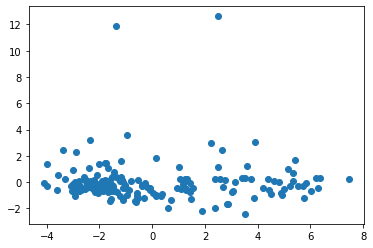

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(principalComponents_countries[:, 0], principalComponents_countries[:, 1])

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=cluster)
cluster_vals = kmeans.fit_predict(standardized_data)

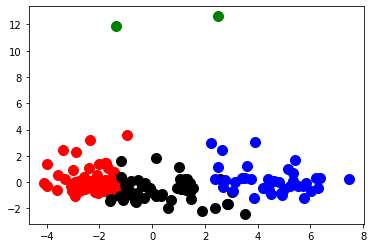

In [ ]:
plt.scatter(principalComponents_countries[cluster_vals ==0,0], principalComponents_countries[cluster_vals == 0,1], s=100, c='red')
plt.scatter(principalComponents_countries[cluster_vals ==1,0], principalComponents_countries[cluster_vals == 1,1], s=100, c='black')
plt.scatter(principalComponents_countries[cluster_vals ==2,0], principalComponents_countries[cluster_vals == 2,1], s=100, c='blue')
plt.scatter(principalComponents_countries[cluster_vals ==3,0], principalComponents_countries[cluster_vals == 3,1], s=100, c='green')
plt.scatter(principalComponents_countries[cluster_vals ==4,0], principalComponents_countries[cluster_vals == 4,1], s=100, c='cyan')
plt.scatter(principalComponents_countries[cluster_vals ==5,0], principalComponents_countries[cluster_vals == 5,1], s=100, c='purple')
plt.scatter(principalComponents_countries[cluster_vals ==6,0], principalComponents_countries[cluster_vals == 6,1], s=100, c='orange')
plt.scatter(principalComponents_countries[cluster_vals ==7,0], principalComponents_countries[cluster_vals == 7,1], s=100, c='yellow')
plt.scatter(principalComponents_countries[cluster_vals ==8,0], principalComponents_countries[cluster_vals == 8,1], s=100, c='grey')
plt.scatter(principalComponents_countries[cluster_vals ==9,0], principalComponents_countries[cluster_vals == 9,1], s=100, c='brown')
plt.scatter(principalComponents_countries[cluster_vals ==10,0], principalComponents_countries[cluster_vals == 10,1], s=100, c='magenta')
plt.scatter(principalComponents_countries[cluster_vals ==11,0], principalComponents_countries[cluster_vals == 11,1], s=100, c='lime')
plt.scatter(principalComponents_countries[cluster_vals ==12,0], principalComponents_countries[cluster_vals == 12,1], s=100, c='pink')
plt.scatter(principalComponents_countries[cluster_vals ==13,0], principalComponents_countries[cluster_vals == 13,1], s=100, c='maroon')
plt.scatter(principalComponents_countries[cluster_vals ==14,0], principalComponents_countries[cluster_vals == 14,1], s=100, c='azure')

In [ ]:
cv_sr = pd.Series(cluster_vals)
clusters = []
for i in range(cluster):
    clusters.append(country_data['Country'][cv_sr == i].to_list())

In [ ]:
clusters

[['Albania',
  'Argentina',
  'Armenia',
  'Aruba',
  'Austria',
  'Azerbaijan',
  'Bahamas',
  'Bahrain',
  'Barbados',
  'Belarus',
  'Belgium',
  'Bermuda',
  'Bosnia and Herzegovina',
  'Brunei Darussalam',
  'Bulgaria',
  'Canada',
  'Chile',
  'Croatia',
  'Cuba',
  'Cyprus',
  'Czech Republic',
  "Democratic People's Republic of Korea",
  'Denmark',
  'Estonia',
  'Finland',
  'France',
  'Georgia',
  'Germany',
  'Greece',
  'Hong Kong SAR, China',
  'Hungary',
  'Iceland',
  'Indonesia',
  'Iran',
  'Ireland',
  'Israel',
  'Italy',
  'Japan',
  'Jordan',
  'Kazakhstan',
  'Kuwait',
  'Kyrgyz Republic',
  'Latvia',
  'Lebanon',
  'Liechtenstein',
  'Lithuania',
  'Luxembourg',
  'Macao (Macau) SAR, China',
  'Macedonia',
  'Malaysia',
  'Malta',
  'Mauritius',
  'Mexico',
  'Moldova',
  'Mongolia',
  'Netherlands',
  'New Zealand',
  'Norway',
  'Oman',
  'Palau',
  'Poland',
  'Qatar',
  'Romania',
  'Russian Federation',
  'San Marino',
  'Saudi Arabia',
  'Serbia',
  'Seych

In [ ]:
education_data = standardized_data[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 20, 21, 22, 23]]
cluster_vals_ed = kmeans.fit_predict(education_data)
cv_sr_ed = pd.Series(cluster_vals_ed)
clusters_ed = []
for i in range(cluster):
    clusters_ed.append(country_data['Country'][cv_sr_ed == i].to_list())
clusters_ed

[['Antigua and Barbuda',
  'Argentina',
  'Aruba',
  'Bahamas',
  'Bolivia',
  'Brazil',
  'Chile',
  'Colombia',
  'Costa Rica',
  'Dominica',
  'Dominican Republic',
  'Ecuador',
  'Egypt',
  'El Salvador',
  'Fiji',
  'Guatemala',
  'Honduras',
  'Indonesia',
  'Ireland',
  'Israel',
  'Libya',
  'Luxembourg',
  'Marshall Islands',
  'Mauritius',
  'Mexico',
  'Netherlands',
  'Palau',
  'Panama',
  'Paraguay',
  'Peru',
  'Philippines',
  'Portugal',
  'Tonga',
  'Turkey',
  'Uruguay',
  'Venezuela'],
 ['Afghanistan',
  'Angola',
  'Bangladesh',
  'Benin',
  'Burkina Faso',
  'Burundi',
  'Cambodia',
  'Cameroon',
  'Central African Republic',
  'Chad',
  'Congo',
  "Cote d'Ivoire",
  'Djibouti',
  'Equatorial Guinea',
  'Eritrea',
  'Ethiopia',
  'Gabon',
  'Guinea',
  'Guinea-Bissau',
  'India',
  'Iraq',
  'Kenya',
  'Liberia',
  'Madagascar',
  'Malawi',
  'Mali',
  'Mauritania',
  'Mozambique',
  'Niger',
  'Nigeria',
  'Pakistan',
  'Papua New Guinea',
  'Rwanda',
  'Senegal'

In [ ]:
economic_data = standardized_data[[0, 14, 15, 16, 17, 18, 19]]
cluster_vals_ec = kmeans.fit_predict(economic_data)
cv_sr_ec = pd.Series(cluster_vals_ec)
clusters_ec = []
for i in range(cluster):
    clusters_ec.append(country_data['Country'][cv_sr_ec == i].to_list())
clusters_ec

[['Angola',
  'Benin',
  'Bolivia',
  'Burkina Faso',
  'Burundi',
  'Cambodia',
  'Cameroon',
  'Central African Republic',
  'Chad',
  'Comoros',
  'Congo',
  "Cote d'Ivoire",
  'Equatorial Guinea',
  'Ethiopia',
  'Ghana',
  'Guatemala',
  'Guinea',
  'Guinea-Bissau',
  'Kenya',
  'Liberia',
  'Madagascar',
  'Malawi',
  'Mali',
  'Mozambique',
  'Nepal',
  'Niger',
  'Nigeria',
  'Peru',
  'Rwanda',
  'Sierra Leone',
  'Tanzania',
  'Togo',
  'Uganda',
  'Zambia'],
 ['Afghanistan',
  'Albania',
  'Algeria',
  'Antigua and Barbuda',
  'Argentina',
  'Armenia',
  'Aruba',
  'Azerbaijan',
  'Bahamas',
  'Bahrain',
  'Barbados',
  'Belarus',
  'Belize',
  'Bhutan',
  'Bosnia and Herzegovina',
  'Botswana',
  'Brunei Darussalam',
  'Bulgaria',
  'Chile',
  'Colombia',
  'Costa Rica',
  'Croatia',
  'Cuba',
  'Cyprus',
  'Czech Republic',
  'Djibouti',
  'Dominica',
  'Dominican Republic',
  'Ecuador',
  'Egypt',
  'El Salvador',
  'Eritrea',
  'Estonia',
  'Fiji',
  'Gabon',
  'Gambia',

In [ ]:
import collections

ed_ec_combined = collections.defaultdict(list)

for i in range(cluster):
  ed_ec_combined[i] = collections.defaultdict(list)

for i in range(178):
  country = country_data['Country'][i]
  ed_ec_combined[cv_sr_ed[i]][cv_sr_ec[i]].append(country)

In [ ]:
ed_ec_combined

defaultdict(list,
            {0: defaultdict(list,
                         {0: ['Bolivia', 'Guatemala', 'Peru'],
                          1: ['Antigua and Barbuda',
                           'Argentina',
                           'Aruba',
                           'Bahamas',
                           'Chile',
                           'Colombia',
                           'Costa Rica',
                           'Dominica',
                           'Dominican Republic',
                           'Ecuador',
                           'Egypt',
                           'El Salvador',
                           'Fiji',
                           'Honduras',
                           'Libya',
                           'Marshall Islands',
                           'Mauritius',
                           'Palau',
                           'Panama',
                           'Paraguay',
                           'Portugal',
                           'Tonga',
              

[[ 3 28  0  3]
 [25 11 44 26]
 [ 8  2 26  0]
 [ 0  1  1  0]]


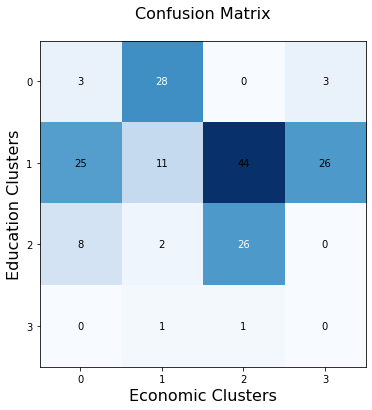

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(cv_sr_ec, cv_sr_ed)
print(cm)

from mlxtend.plotting import plot_confusion_matrix
 
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(6, 6), cmap=plt.cm.Blues)
plt.xlabel('Economic Clusters', fontsize=16)
plt.ylabel('Education Clusters', fontsize=16)
plt.title('Confusion Matrix', fontsize=16)
plt.show()

In [ ]:
df = country_data[country_data['Country'] == ed_ec_combined[2][2][0]]

for entry in ed_ec_combined[2][2]:
  print(entry)
  df = df.append(country_data[country_data['Country'] == entry])

Austria
Belgium
Bermuda
Canada
Democratic People's Republic of Korea
Denmark
Finland
France
Germany
Hong Kong SAR, China
Iceland
Italy
Japan
Liechtenstein
Macao (Macau) SAR, China
New Zealand
Norway
Poland
Qatar
Russian Federation
Singapore
Sweden
Switzerland
Thailand
United Arab Emirates
United Kingdom


In [28]:
index = [8, 15, 18, 30, 44, 45, 57, 58, 62, 70, 72, 79, 81, 94, 97, 117, 121, 130, 132, 134, 144, 154, 155, 159, 168, 169]



In [29]:
df = pd.DataFrame(columns=imputed_data.columns)

for i in index:
  df.loc[len(df.index)] = imputed_data.loc[i]

In [58]:
import csv

table = []
sig_table = []

with open("all_feature_comparison.csv", "w", newline='') as f:
  with open("best_feature_comparison.csv", "w", newline='') as g:
    w1 = csv.writer(f)
    w2 = csv.writer(g)
    table.append(['', 'Mean of Best Cluster', 'Mean of All Countries', 'Difference (%)'])
    sig_table.append(['', 'Mean of Best Cluster', 'Mean of All Countries', 'Difference (%)'])
    for i in range(24):
      diff = abs((imputed_data[i].mean() - df[i].mean()) / df[i].mean()) * 100
      row = [useful_data.columns[i], df[i].mean(), imputed_data[i].mean(), diff]
      table.append(row)
      if diff > 45:
        sig_table.append(row)
    w2.writerows(sig_table)

  w1.writerows(table)

In [49]:
from tabulate import tabulate

print(tabulate(table, headers='firstrow', tablefmt='fancy_grid', numalign="right"))
table.to_csv('all_feature_comparison.csv')

╒════════════════════════════════════════╤════════════════════════╤═════════════════════════╤══════════════════╕
│                                        │   Mean of Best Cluster │   Mean of All Countries │   Difference (%) │
╞════════════════════════════════════════╪════════════════════════╪═════════════════════════╪══════════════════╡
│ Population (thousands)                 │                31278.3 │                   37091 │          18.5837 │
├────────────────────────────────────────┼────────────────────────┼─────────────────────────┼──────────────────┤
│ Compulsory attendance amount           │                10.4231 │                 9.91011 │          4.92143 │
├────────────────────────────────────────┼────────────────────────┼─────────────────────────┼──────────────────┤
│ Early education attendance rate        │                26.4231 │                 24.2809 │          8.10722 │
├────────────────────────────────────────┼────────────────────────┼─────────────────────────┼───

AttributeError: ignored

In [47]:
print(tabulate(sig_table, headers='firstrow', tablefmt='fancy_grid', numalign="right"))

╒═══════════════════════════════════════╤════════════════════════╤═════════════════════════╤══════════════════╕
│                                       │   Mean of Best Cluster │   Mean of All Countries │   Difference (%) │
╞═══════════════════════════════════════╪════════════════════════╪═════════════════════════╪══════════════════╡
│ Primary drop out rate                 │                5.58258 │                 17.5062 │          213.587 │
├───────────────────────────────────────┼────────────────────────┼─────────────────────────┼──────────────────┤
│ Primary repeaters rate                │                1.05147 │                 5.03141 │          378.511 │
├───────────────────────────────────────┼────────────────────────┼─────────────────────────┼──────────────────┤
│ Lower secondary teacher-student ratio │                12.2546 │                 18.1591 │          48.1815 │
├───────────────────────────────────────┼────────────────────────┼─────────────────────────┼────────────